## Mnist Classification


https://colab.research.google.com/drive/1QvbnIDWhH7fLFeEKTXlrBipoM1z2va44?usp=sharing


# Notebook Overview and Imports

This notebook trains a simple feedforward neural network to classify handwritten digits from the MNIST dataset.

Notes:

- MNIST contains 70,000 grayscale images of handwritten digits (28x28 pixels).
- We'll normalize pixel values to [0, 1], build a small dense network, train it, and evaluate performance.

The next cell imports TensorFlow/Keras and plotting utilities used throughout the notebook.


In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
import matplotlib.pyplot as plt

## Load the MNIST Dataset

This cell downloads and loads the MNIST dataset into training and test sets:

- `X_train`, `X_test` contain images shaped (28, 28)
- `y_train`, `y_test` contain integer labels 0–9

We use the built-in Keras loader which returns NumPy arrays ready for preprocessing.


In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [7]:
y_train.shape, y_test.shape

((60000,), (10000,))

## Preprocessing: Normalize Pixel Values

Images are grayscale with pixel values in range 0–255. Dividing by 255 rescales values to [0, 1], which helps neural network training converge faster and improves numerical stability.

This is a simple but important preprocessing step for image data.


In [8]:
X_train = X_train / 255
X_test = X_test / 255

## Model Architecture

We build a small fully connected (dense) network:

- `Flatten` converts 28x28 images to a 1D vector (784 features)
- Dense(128, relu): First hidden layer with ReLU activations
- Dense(32, relu): Second hidden layer to reduce dimensionality
- Dense(10, softmax): Output layer with 10 units (one per digit) and softmax for probability distribution

This architecture is simple and suitable for demonstration; convolutional models typically perform better on image tasks.


In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="softmax"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

## Compile: Loss, Optimizer, Metrics

- Loss: `sparse_categorical_crossentropy` is appropriate when labels are integer encoded (0–9).
- Optimizer: `Adam` adapts learning rates and generally converges well.
- Metrics: Track `accuracy` during training and validation.

After compiling, the model is ready for training via `fit`.


In [ ]:
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"]
)

## Training the Model

Train the network using `fit`:

- `epochs=25`: Number of passes over the training data
- `validation_split=0.2`: Reserve 20% of training data for validation to monitor generalization

The `history` object stores loss and accuracy values for plotting learning curves.


In [ ]:
history = model.fit(X_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8537 - loss: 0.4899 - val_accuracy: 0.9527 - val_loss: 0.1576
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9629 - loss: 0.1243 - val_accuracy: 0.9663 - val_loss: 0.1140
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9747 - loss: 0.0821 - val_accuracy: 0.9702 - val_loss: 0.0970
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9818 - loss: 0.0575 - val_accuracy: 0.9703 - val_loss: 0.1008
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9850 - loss: 0.0468 - val_accuracy: 0.9737 - val_loss: 0.0947
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9897 - loss: 0.0317 - val_accuracy: 0.9751 - val_loss: 0.0941
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9910 - loss: 0.0272 - val_accuracy: 0.9750 - val_loss: 0.0938
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9923 - loss: 0.0251 - 

## Predict on Test Set

`model.predict` returns probability distributions for each sample. We convert these to class labels by taking the index of the maximum probability (argmax).


In [13]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


## Convert Probabilities to Class Labels

Use `argmax(axis=1)` to turn the per-class probabilities into single predicted labels (0–9). These labels can be compared with `y_test` for evaluation.


In [14]:
y_pred = y_prob.argmax(axis=1)

## Evaluate Model Accuracy

`accuracy_score(y_test, y_pred)` returns the proportion of test examples the model predicted correctly. Use this as a quick performance summary, but consider also inspecting confusion matrices or per-class metrics for deeper insight.


In [15]:
from sklearn.metrics import accuracy_score

In [16]:
accuracy_score(y_test, y_pred)

0.9816

## Plot Training and Validation Loss

Plot the training and validation loss curves to check model learning behavior:

- A steadily decreasing training loss indicates learning.
- If validation loss starts increasing while training loss decreases, the model may be overfitting.

Use these plots to decide on early stopping, regularization, or architecture adjustments.


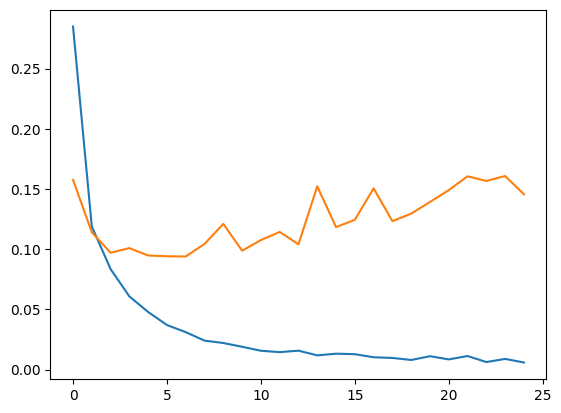

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.show()

## Plot Training and Validation Accuracy

Plot accuracy for training and validation sets to monitor how well the model generalizes. Use these plots together with loss curves to assess model performance and detect overfitting or underfitting.


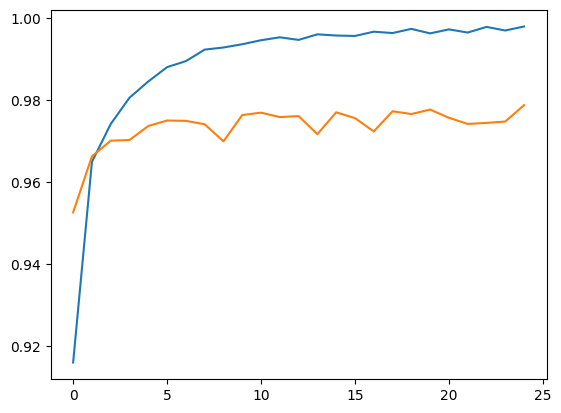

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

plt.show()

## Visualize a Test Image and Model Prediction

Display a test image to inspect the input and then run the model to see its predicted label for that specific sample. This helps qualitatively check whether predictions match what we see visually.


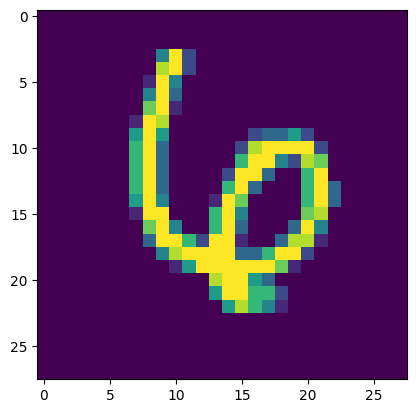

In [26]:
plt.imshow(X_test[22])
plt.show()

In [ ]:
model.predict(X_test[22].reshape(1, 28, 28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([6])